# Load the dataset

In [10]:
# Run this cell and select the kaggle.json file to upload
# the kaggle.json file must be of teh form:
#
# {"username":"your_username","key":"your_kaggle_API_token"}

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"your_username","key":"your_kaggle_API_token"}'}

In [11]:
# Let's make sure the kaggle.json file is present. 
!ls -lha kaggle.json
# Next, install the Kaggle API client. 
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle, 
# so move it there. 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup. 
!chmod 600 ~/.kaggle/kaggle.json

-rw------- 1 root root 63 Jun 28 07:07 kaggle.json


In [12]:
%cd /content/drive/My\ Drive/ConditionalVAE_DL_Project3

/content/drive/My Drive/ConditionalVAE_DL_Project3


In [13]:
!python3 dataloader.py

Download completed.


# Define the model

In [1]:
%cd /content/drive/My\ Drive/ConditionalVAE_DL_Project3

/content/drive/My Drive/ConditionalVAE_DL_Project3


In [2]:
# Hyper-paramters
label_dim = 40
image_dim = [64, 64, 3]
latent_dim = 128
beta = 0.65

batch_size = 32

In [3]:
import tensorflow as tf
from ConvolutionalCondVAE import ConvCVAE, Decoder, Encoder

# Model
encoder = Encoder(latent_dim)
decoder = Decoder(batch_size = batch_size,)
model = ConvCVAE(
                encoder,
                decoder,
                batch_size = batch_size,
                label_dim = label_dim,
                latent_dim = latent_dim,
                beta = beta,
                image_dim = image_dim)

# Restore checkpoint 

In [4]:
import os

# Checkpoint path
checkpoint_root = "./CVAE{}_{}_checkpoint".format(latent_dim, beta)
checkpoint_name = "model"
save_prefix = os.path.join(checkpoint_root, checkpoint_name)

# Define the checkpoint
checkpoint = tf.train.Checkpoint(module=model)

In [5]:
# Restore the latest checkpoint

latest = tf.train.latest_checkpoint(checkpoint_root)
if latest is not None:
    checkpoint.restore(latest)
    print("Checkpoint restored:", latest)
else:
  print("No checkpoint!")

Checkpoint restored: ./CVAE128_0.65_checkpoint/model-11


# Read test data

In [14]:
import argparse
import json
import os
from matplotlib import pyplot as plt
import sys

import tensorflow as tf

from utils import batch_generator, convert_batch_to_image_grid, read_data

# Read test_data.pickle 
test_data = read_data("./test_data")

# Saving path for generated images
folder = "./images_{}_{}_30epochs/".format(latent_dim, beta)
if not os.path.exists(folder):
    os.mkdir(folder)

# Reconstruction and Generation

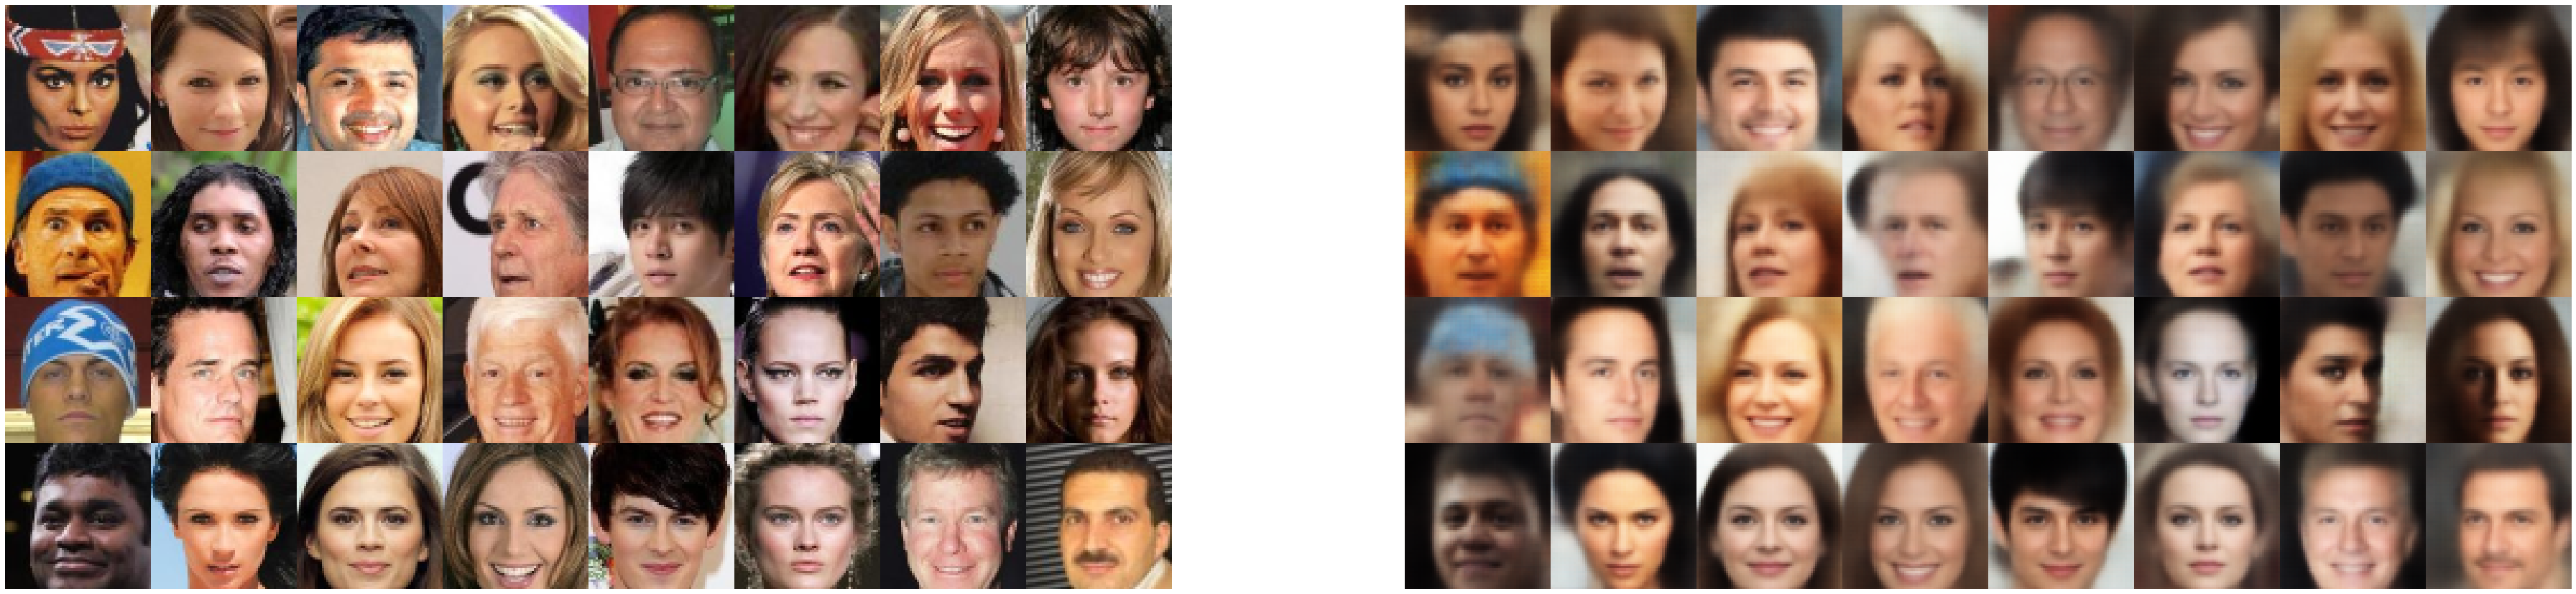

Reconstruction of a batch of test set images.
Generation of 16 images with attributes:  [2, 9, 15, 21, 24, 31, 33, 39]


<Figure size 432x288 with 0 Axes>

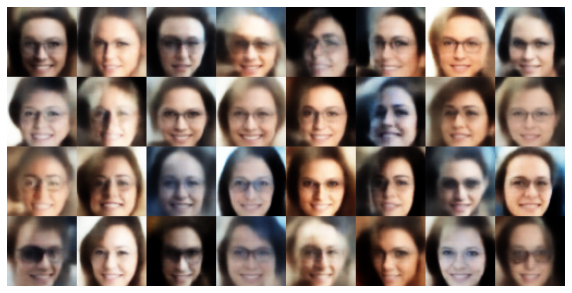

<Figure size 432x288 with 0 Axes>

In [15]:
from image_generation_utils import image_generation, image_reconstruction

# Image reconstruction
image_reconstruction(model, test_data, save_path=None) 

# Conditional Image Generation   
target_attr = [2,9,15,21,24,31,33,39]
#target_attr = None 
image_generation(model, test_data, target_attr = target_attr, save_path = None)

# Attributes Manipulation

In [18]:
import numpy as np
#from image_generation_utils import attr_manipulation

# Build a batch of test images
batch_gen = batch_generator(test_data['batch_size'], test_data['test_img_ids'], model_name = 'Conv')
images, labels = next(batch_gen)

# Dictionary with desired attributes with their value
target_attr = {15 : 1}

# Get reconstructed and modified images
reconstructed_images, modified_images = attr_manipulation(images, labels, target_attr, model)

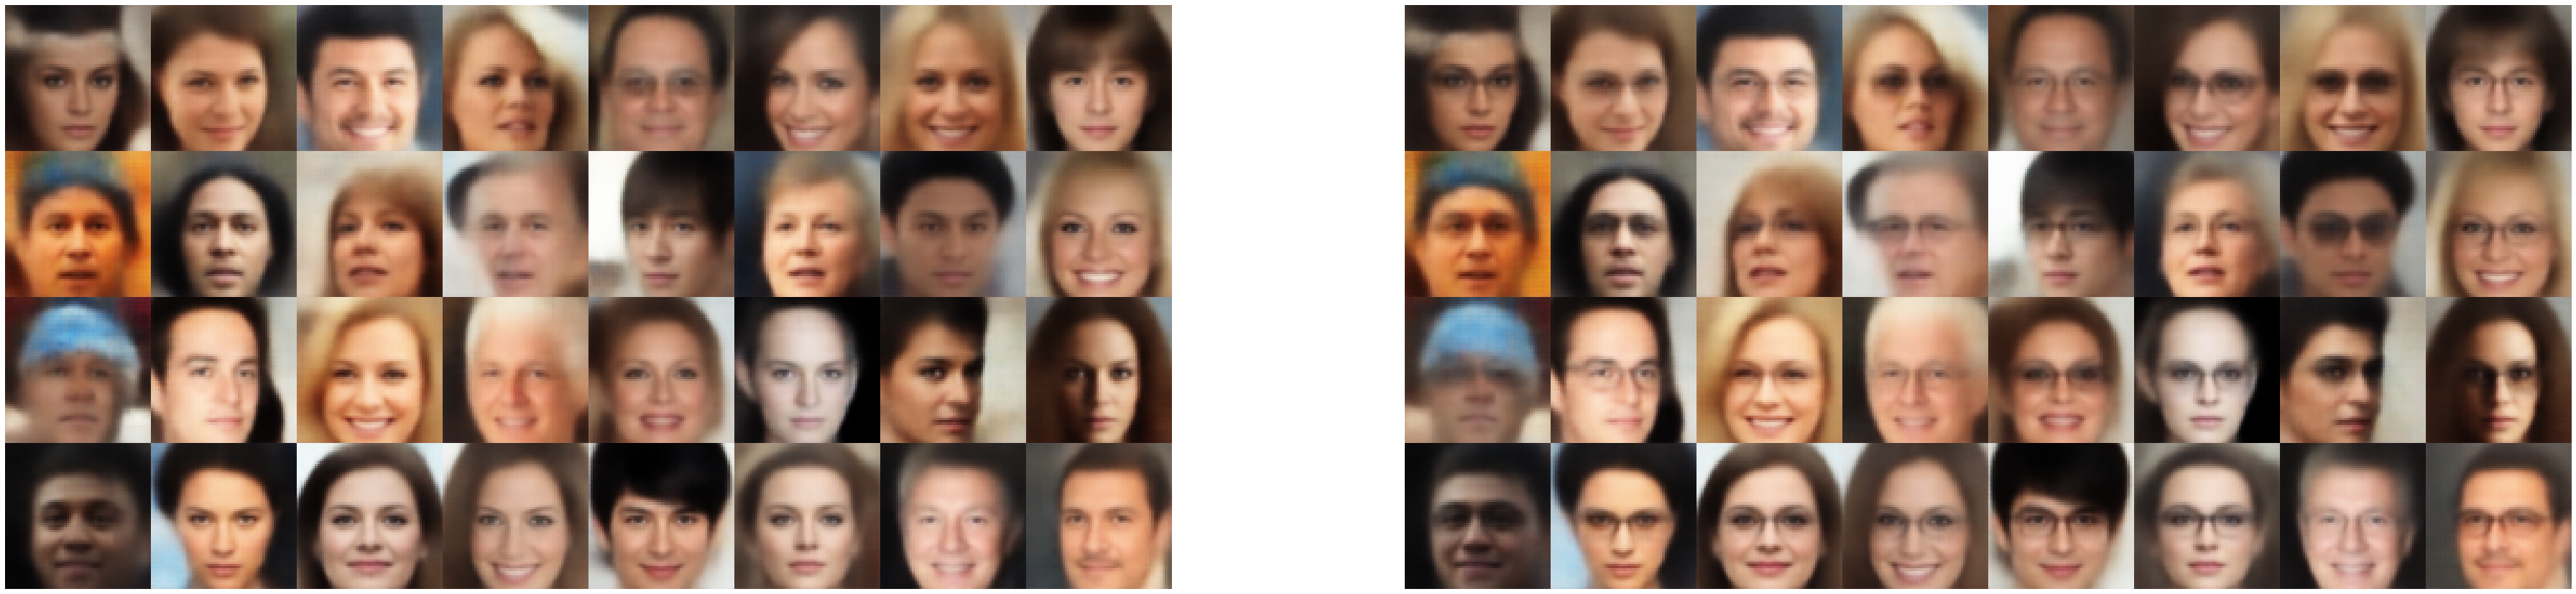

In [19]:
f = plt.figure(figsize=(64,40))
ax = f.add_subplot(1,2,1)
ax.imshow(convert_batch_to_image_grid(reconstructed_images),
              interpolation='nearest')
plt.axis('off')

ax = f.add_subplot(1,2,2)
ax.imshow(convert_batch_to_image_grid(modified_images),
              interpolation='nearest')
plt.axis('off')
plt.show()

#  Vector Interpolation


(-0.5, 511.5, 255.5, -0.5)

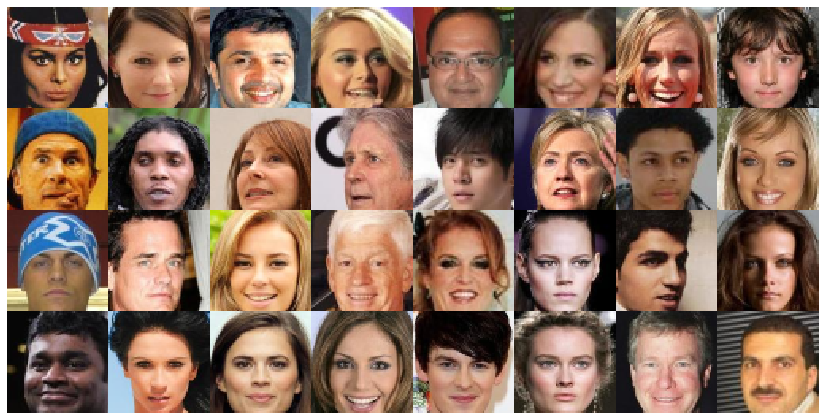

In [20]:
from matplotlib import pyplot as plt
import numpy as np

from utils import batch_generator, convert_batch_to_image_grid
from image_generation_utils import interpolation

# Build a batch of test images
batch_gen = batch_generator(test_data['batch_size'], test_data['test_img_ids'], model_name = 'Conv')
imgs, labels = next(batch_gen)

# Plot original Images 
f = plt.figure(figsize=(32,40))
ax = f.add_subplot(1,2,1)
ax.imshow(convert_batch_to_image_grid(imgs),
              interpolation='nearest')
plt.axis('off')

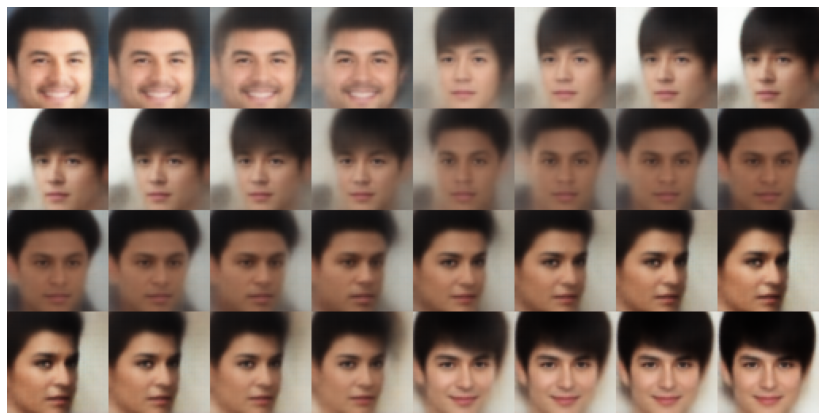

In [21]:
# Target images to interpolate
target_images = [2,12,14,22,28]

# Interpolation
images = interpolation(target_images, imgs, labels, model)
 
# Plot resulting images
f = plt.figure(figsize=(32,40))
ax = f.add_subplot(1,2,1)
ax.imshow(convert_batch_to_image_grid(np.asarray(images)))
plt.axis('off');